# Binary Search Tree

Kostadin Bajalcaliev, Index: 239038

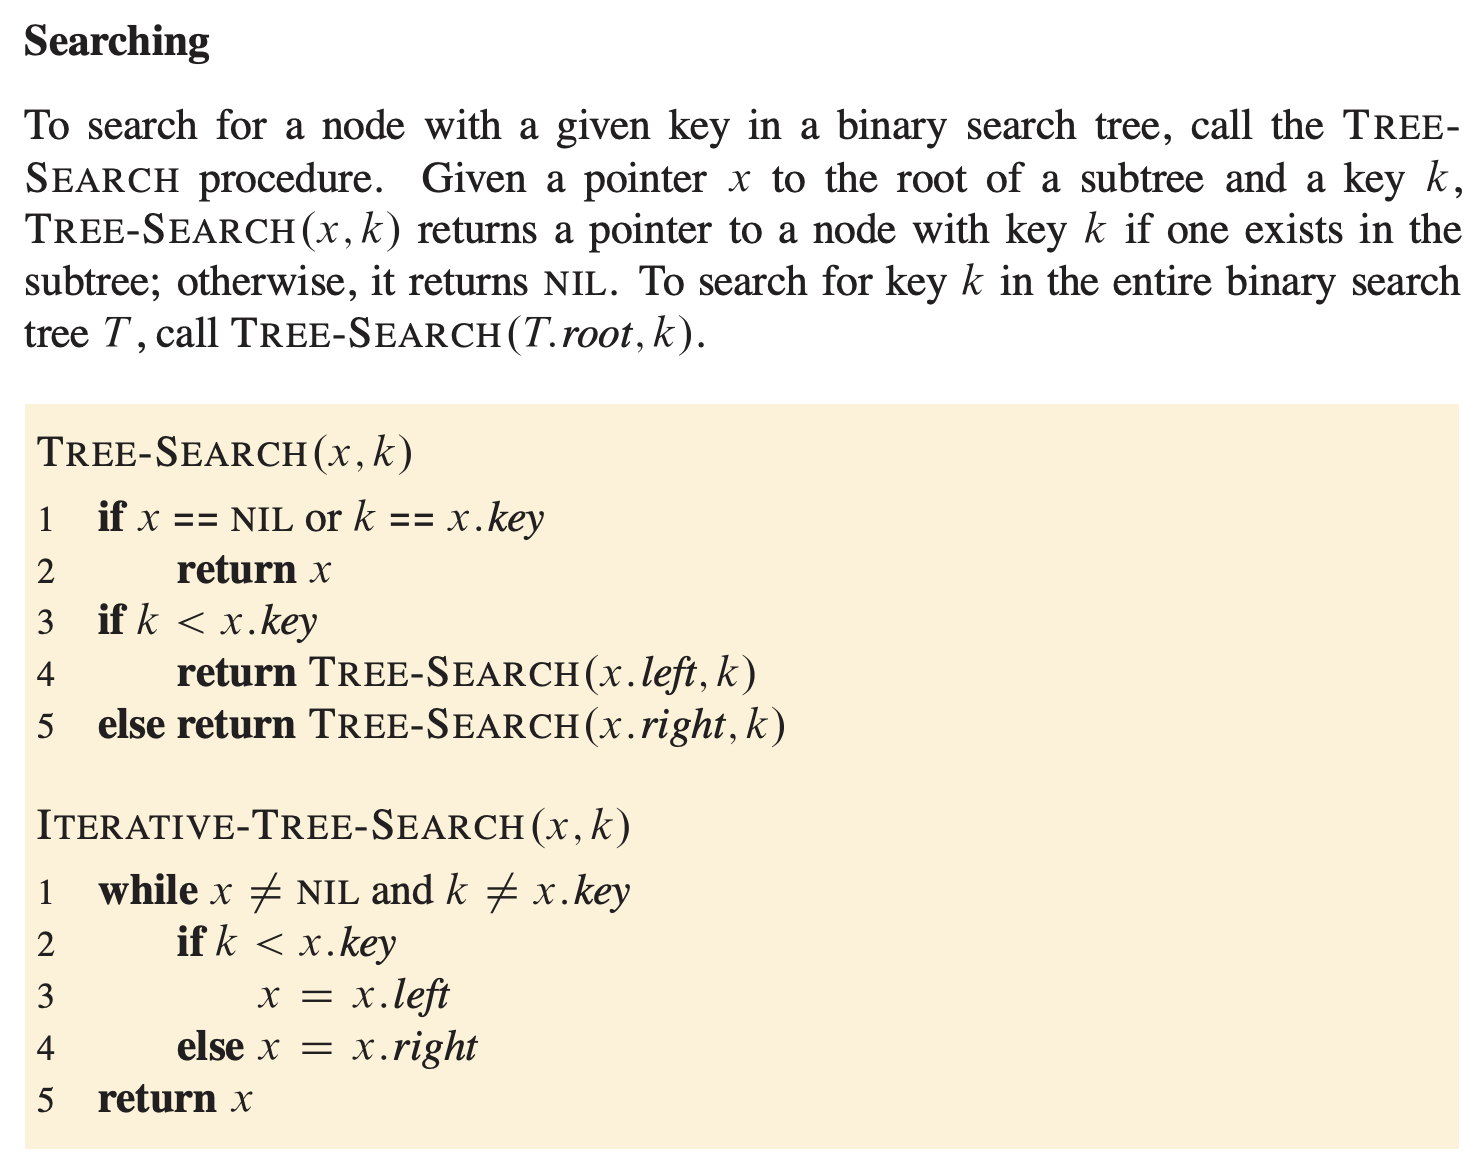
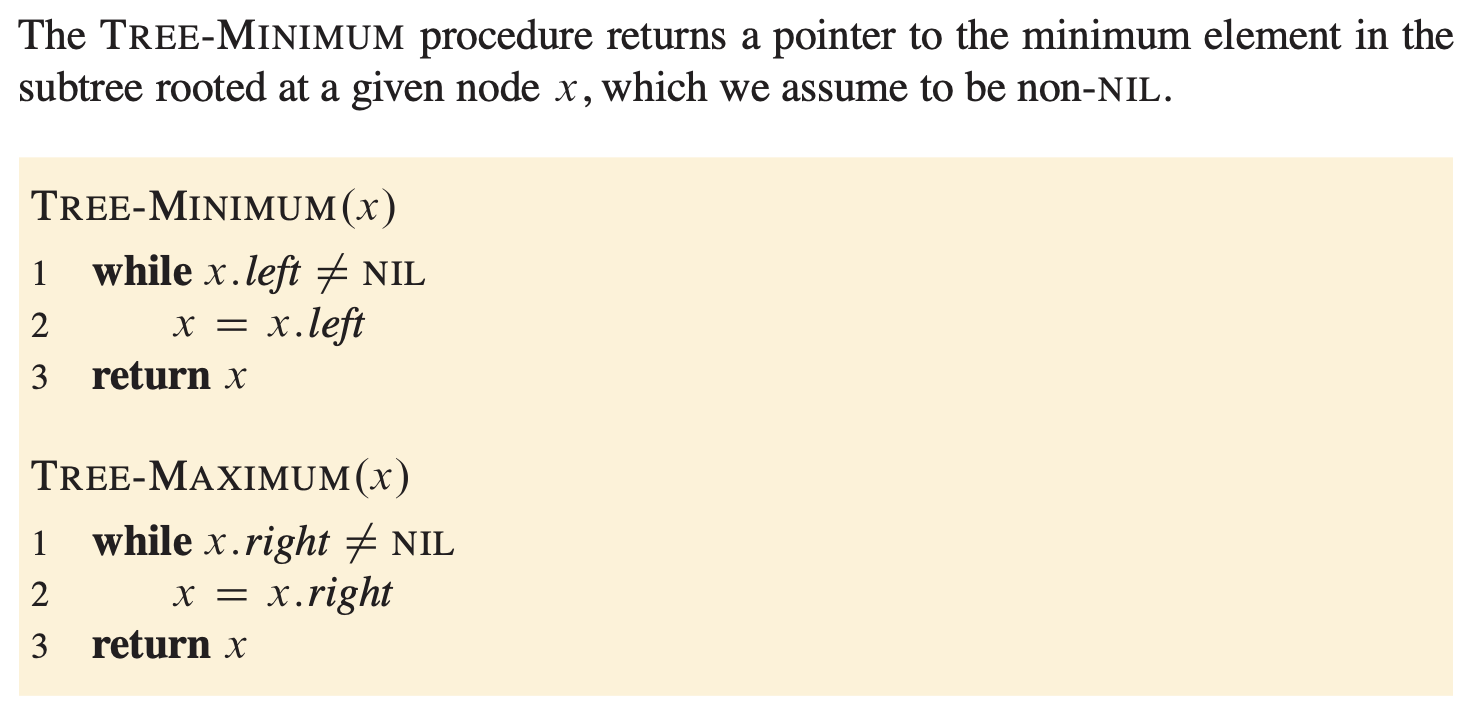
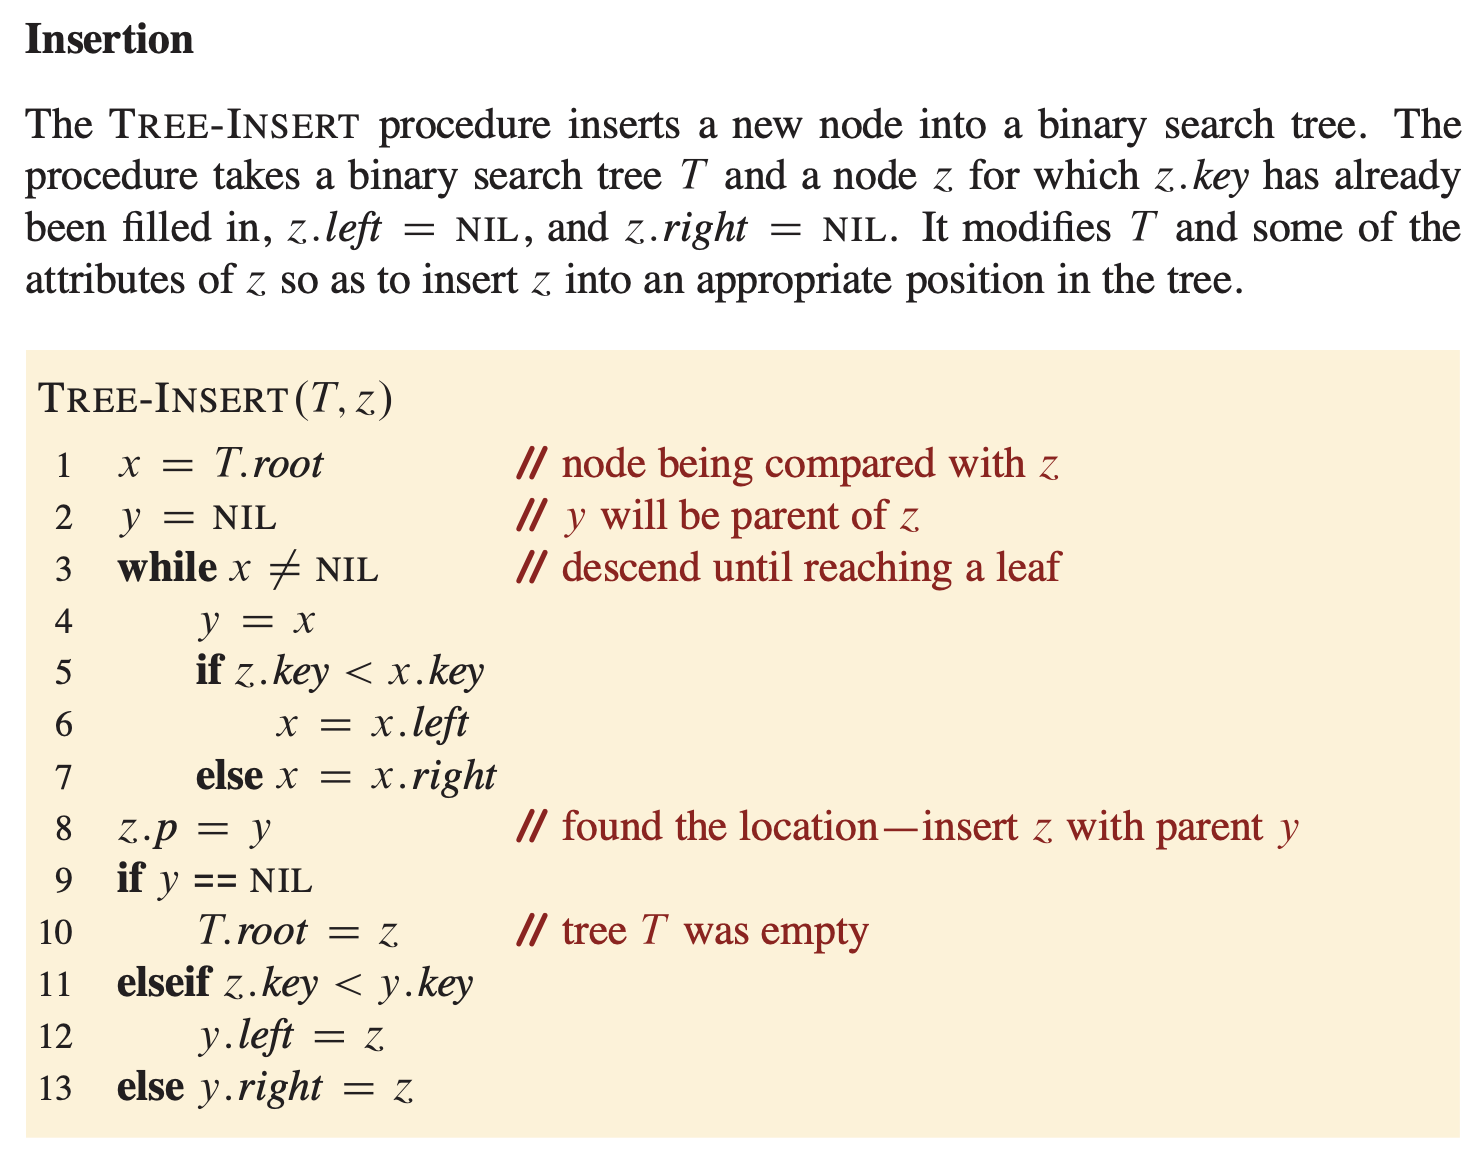
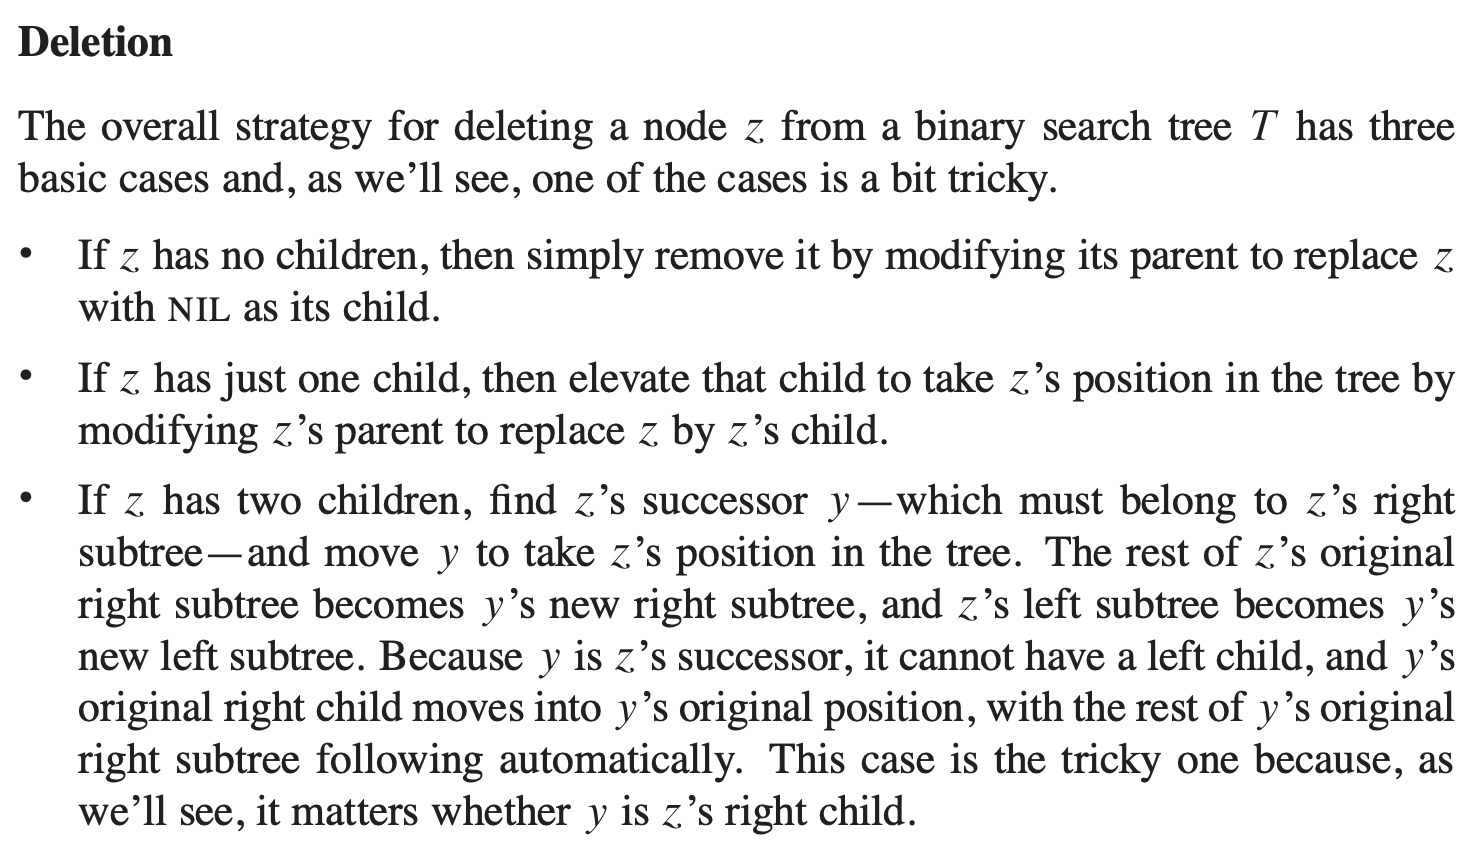
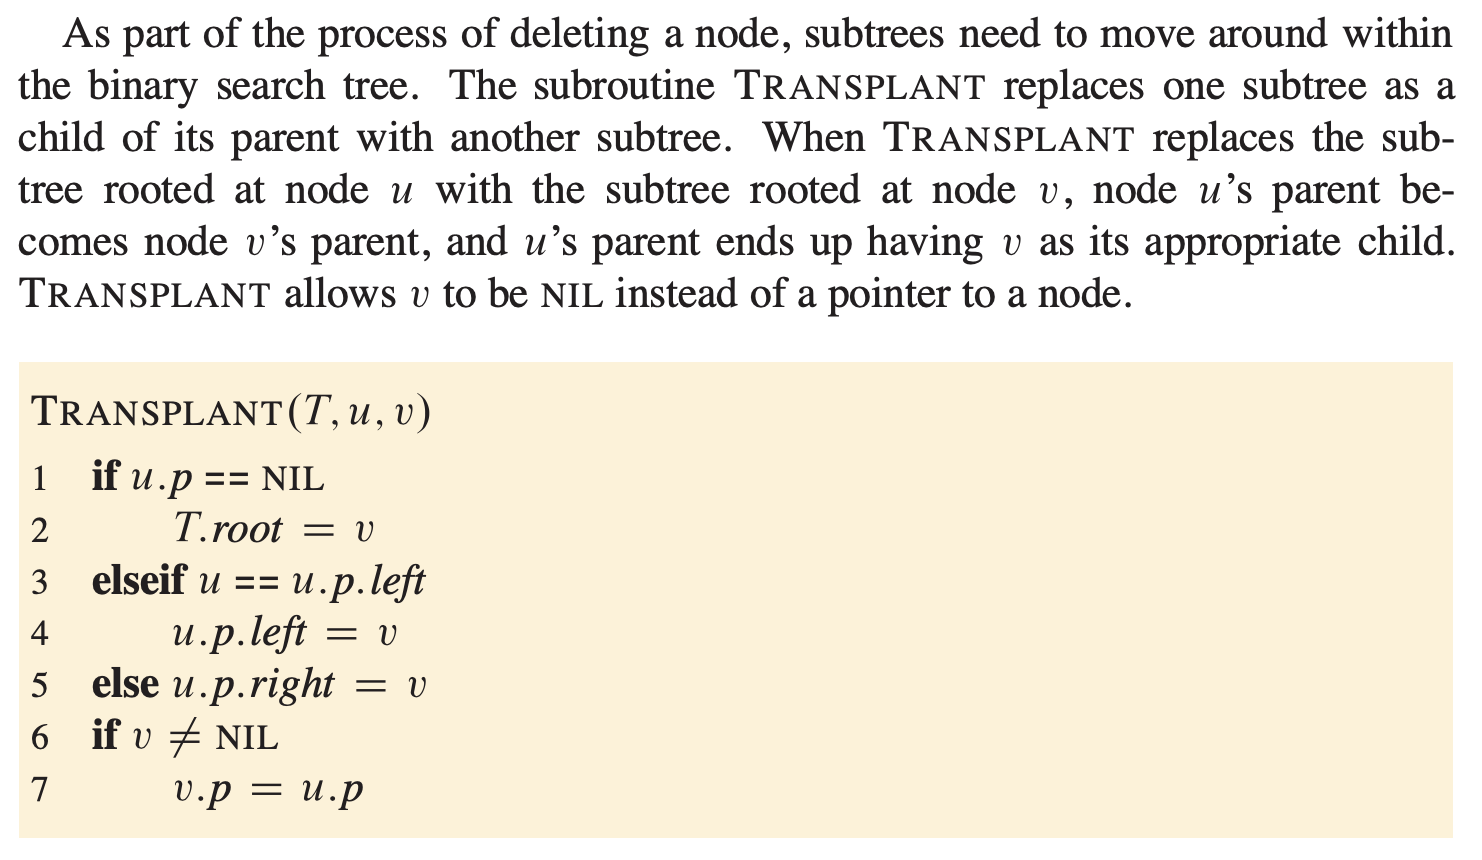
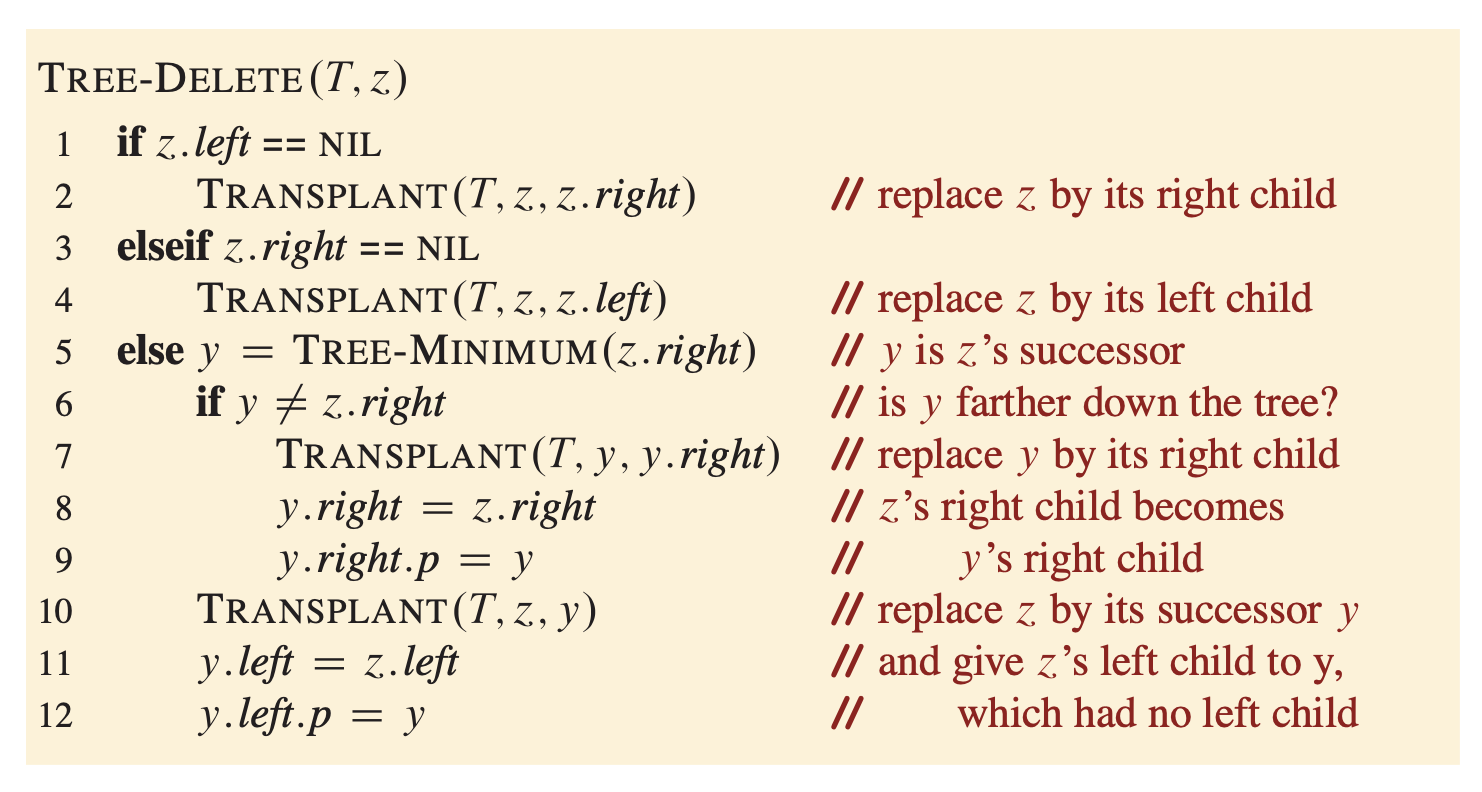

### GO Implementation

In [ ]:
package asp

import "testing"

type Node struct {
	key   int
	par   *Node
	left  *Node
	right *Node
}

type BST struct {
	root *Node
}

func NewBST() *BST {
	return &BST{root: nil}
}

// TREE-INSERT (T, z)
// 1   x = T.root          // node being compared with z
// 2   y = NIL             // y will be parent of z
// 3   while x != NIL      // descend until reaching a leaf
// 4     y = x
// 5     if z.key < x.key
// 6       x = x.left
// 7     else x = x.right
// 8   z.par = y           // found the location - insert z with parent y
// 9   if y == NIL
// 10    T.root = z        // tree T was empty
// 11  elseif z.key < y.key
// 12    y.left = z
// 13  else y.right = z

func (T *BST) Insert(key int) {
	var z = &Node{key: key}
	var x = T.root
	var y *Node = nil
	for x != nil {
		y = x
		if z.key < x.key {
			x = x.left
		} else {
			x = x.right
		}
	}
	z.par = y
	if y == nil {
		T.root = z
	} else if z.key < y.key {
		y.left = z
	} else {
		y.right = z
	}
}

// TRANSPLANT (T, u, v)
// 1  if u.par == NIL
// 2    T.root = v
// 3  elseif u == u.par.left
// 4    u.p.left = v
// 5  else u.par.right = v
// 6  if v != NIL
// 7    v.par = u.par

func (T *BST) Transplant(u, v *Node) {
	if u.par == nil {
		T.root = v
	} else if u == u.par.left {
		u.par.left = v
	} else {
		u.par.right = v
	}
	if v != nil {
		v.par = u.par
	}
}

// TREE-DELETE (T, z)
// 1 if z.left == NIL
// 2   TRANSPLANT (T, z, z.right)        // replace z by its right child
// 3 elseif z.right == NIL
// 4   TRANSPLANT (T, z, z.left)         // replace z by its left child
// 5 else y = TREE-MINIMUM(z.right)      // y is z’s successor
// 6      if y != z.right                // is y farther down the tree?
// 7          TRANSPLANT (T, y, y.right) // replace y by its right child
// 8          y.right = z.right          // z’s right child becomes
// 9          y.right.par = y            // y’s right child
// 10     TRANSPLANT (T, z, y)           // replace z by its successor y
// 11     y.left = z.left                // and give z’s left child to y,
// 12     y.left.par = y                 // which had no left child

func (T *BST) Delete(value int) bool {
	var z = T.Search(value)
	if z == nil {
		return false
	}
	if z.left == nil {
		T.Transplant(z, z.right)
	} else if z.right == nil {
		T.Transplant(z, z.left)
	} else {
		var y = minimum(z.right)
		if y != z.right {
			T.Transplant(y, y.right)
			y.right = z.right
			y.right.par = y
		}
		T.Transplant(z, y)
		y.left = z.left
		y.left.par = y
	}
	return true
}

func (T *BST) Search(value int) *Node {
	var x = T.root
	for x != nil {
		if value == x.key {
			return x
		} else if value < x.key {
			x = x.left
		} else {
			x = x.right
		}
	}
	return nil
}

func minimum(z *Node) *Node {
	var x = z
	for x.left != nil {
		x = x.left
	}
	return x
}

// Print the tree in ascii with indentation
func (T *BST) Print(title string) {
	println(title)
	println("-------------")
	printNode(T.root, 0, false)
	println("-------------")
}

func printNode(node *Node, level int, left bool) {
	if node == nil {
		return
	}
	for i := 1; i < level; i++ {
		print("    ")
	}
	if level > 0 {
		if left {
			print("-L- ")
		} else {
			print("-R- ")
		}
	}
	print("(")
	print(node.key)
	print(")\n")
	printNode(node.left, level+1, true)
	printNode(node.right, level+1, false)
}

In [ ]:
func TestBST(t *testing.T) {
	bst := NewBST()
	values := []int{5, 3, 7, 2, 4, 6, 8, 1, 9}

	for _, v := range values {
		bst.Insert(v)
	}
	bst.Print("Insertion")

	bst.Delete(3)
	bst.Print("Delete 3 ...")
	if bst.Search(3) != nil {
		t.Errorf("Did not expect to find value 3 in BST after deletion")
	}

	bst.Delete(5)
	bst.Print("Delete 5 ...")
	if bst.Search(5) != nil {
		t.Errorf("Did not expect to find value 5 in BST after deletion")
	}
}

### JAVA Implementation

In [ ]:
class BST {
    class Node {
        int key;
        Node par;
        Node left;
        Node right;

        public Node(int key) {
            this.key = key;
        }
    }

    public Node root;

    public BST() {
        this.root = null;
    }

    // TREE-INSERT (T, z)
    // 1   x = T.root          // node being compared with z
    // 2   y = NIL             // y will be parent of z
    // 3   while x != NIL      // descend until reaching a leaf
    // 4     y = x
    // 5     if z.key < x.key
    // 6       x = x.left
    // 7     else x = x.right
    // 8   z.par = y           // found the location - insert z with parent y
    // 9   if y == NIL
    // 10    T.root = z        // tree T was empty
    // 11  elseif z.key < y.key
    // 12    y.left = z
    // 13  else y.right = z

    public void Insert(int key) {
        Node z = new Node(key);
        Node x = this.root;
        Node y = null;
        while (x != null) {
            y = x;
            if (z.key < x.key) {
                x = x.left;
            } else {
                x = x.right;
            }
        }
        z.par = y;
        if (y == null) {
            this.root = z;
        } else if (z.key < y.key) {
            y.left = z;
        } else {
            y.right = z;
        }
    }

    // TRANSPLANT (T, u, v)
    // 1  if u.par == NIL
    // 2    T.root = v
    // 3  elseif u == u.par.left
    // 4    u.p.left = v
    // 5  else u.par.right = v
    // 6  if v != NIL
    // 7    v.par = u.par

    private void Transplant(Node u, Node v) {
        if (u.par == null) {
            this.root = v;
        } else if (u == u.par.left) {
            u.par.left = v;
        } else {
            u.par.right = v;
        }
        if (v != null) {
            v.par = u.par;
        }
    }

    // TREE-DELETE (T, z)
    // 1 if z.left == NIL
    // 2   TRANSPLANT (T, z, z.right)        // replace z by its right child
    // 3 elseif z.right == NIL
    // 4   TRANSPLANT (T, z, z.left)         // replace z by its left child
    // 5 else y = TREE-MINIMUM(z.right)      // y is z’s successor
    // 6      if y != z.right                // is y farther down the tree?
    // 7          TRANSPLANT (T, y, y.right) // replace y by its right child
    // 8          y.right = z.right          // z’s right child becomes
    // 9          y.right.par = y            // y’s right child
    // 10     TRANSPLANT (T, z, y)           // replace z by its successor y
    // 11     y.left = z.left                // and give z’s left child to y,
    // 12     y.left.par = y                 // which had no left child

    public boolean Delete(int value) {
        Node z = this.Search(value);
        if (z == null) {
            return false;
        }
        if (z.left == null) {
            this.Transplant(z, z.right);
        } else if (z.right == null) {
            this.Transplant(z, z.left);
        } else {
            Node y = minimum(z.right);
            if (y != z.right) {
                this.Transplant(y, y.right);
                y.right = z.right;
                y.right.par = y;
            }
            this.Transplant(z, y);
            y.left = z.left;
            y.left.par = y;
        }
        return true;
    }

    public Node Search(int value) {
        Node x = this.root;
        while (x != null) {
            if (value == x.key) {
                return x;
            } else if (value < x.key) {
                x = x.left;
            } else {
                x = x.right;
            }
        }
        return null;
    }

    private Node minimum(Node z) {
        Node x = z;
        while (x.left != null) {
            x = x.left;
        }
        return x;
    }

    public void Print(String title) {
        System.out.println(title);
        System.out.println("-------------");
        printNode(this.root, 0, false);
        System.out.print("-------------\n\n");
    }

    private static void printNode(Node node, int level, boolean left) {
        if (node == null) {
            return;
        }
        for (int i = 1; i < level; i++) {
            System.out.print("    ");
        }
        if (level > 0) {
            if (left) {
                System.out.print("-L- ");
            } else {
                System.out.print("-R- ");
            }
        }
        System.out.print("(");
        System.out.print(node.key);
        System.out.print(")\n");
        printNode(node.left, level+1, true);
        printNode(node.right, level+1, false);
    }

    public static void main(String[] args) {
        BST bst = new BST();
        int[] values = {5, 3, 7, 2, 4, 6, 8, 1, 9};

        for (int v : values) {
            bst.Insert(v);
            bst.Print("Insertion");
        }

        bst.Delete(3);
        bst.Print("Delete 3 ...");
        if (bst.Search(3) != null) {
            System.err.println("Did not expect to find value 3 in BST after deletion");
        }

        bst.Delete(5);
        bst.Print("Delete 5 ...");
        if (bst.Search(5) != null) {
            System.err.println("Did not expect to find value 5 in BST after deletion");
        }
    }
}

### Example Execution

In [ ]:
$ cd java
$ javac BST.java
$ java BST

Insertion
-------------
(5)
-------------

Insertion
-------------
(5)
-L- (3)
-------------

Insertion
-------------
(5)
-L- (3)
-R- (7)
-------------

Insertion
-------------
(5)
-L- (3)
    -L- (2)
-R- (7)
-------------

Insertion
-------------
(5)
-L- (3)
    -L- (2)
    -R- (4)
-R- (7)
-------------

Insertion
-------------
(5)
-L- (3)
    -L- (2)
    -R- (4)
-R- (7)
    -L- (6)
-------------

Insertion
-------------
(5)
-L- (3)
    -L- (2)
    -R- (4)
-R- (7)
    -L- (6)
    -R- (8)
-------------

Insertion
-------------
(5)
-L- (3)
    -L- (2)
        -L- (1)
    -R- (4)
-R- (7)
    -L- (6)
    -R- (8)
-------------

Insertion
-------------
(5)
-L- (3)
    -L- (2)
        -L- (1)
    -R- (4)
-R- (7)
    -L- (6)
    -R- (8)
        -R- (9)
-------------

Delete 3 ...
-------------
(5)
-L- (4)
    -L- (2)
        -L- (1)
-R- (7)
    -L- (6)
    -R- (8)
        -R- (9)
-------------

Delete 5 ...
-------------
(6)
-L- (4)
    -L- (2)
        -L- (1)
-R- (7)
    -R- (8)
        -R- (9)
-------------